# Learning from Data: Workshop 2

| Date set     | Hand-in date |
|------------------|-----------------------------------|
|23rd January 2018  | **12:00 Friday 16th February 2018** |


This workshop is worth 10% of the total module mark.



Candidate number: ** 650046686 **  

Your report should consist of your Jupyter notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

Use markdown to explain what you are doing, what the results mean, how they relate to the theory, etc. 

You can add new cells as you think fit and delete ones that are not needed (for example, this and the next one). 

### Submitting the notebooks

Only an electronic submissions is required.  Submit your notebook (the .ipynb file) to electronic copy via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/) using the topic <cmd>2018-02-16~ECM3420~Richard Everson~Workshop 2 Classification and cross validation</cmd>.

You should be able to upload the notebook directly from wherever it is on your machine.  If you're not sure where it is, type <code>pwd</code> (print working directory) in a cell to find out.  To keep the marking anonymous, please don't leave directory names that reveal your identity in cells.

<div class="alert alert-warning">
Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 

<font color='blue'>**All of my comments in markdown cells below are written in blue to make my comments clear and stand out from the original instruction text.**</font>

In [60]:
%pylab inline
figsize(8,8)

Populating the interactive namespace from numpy and matplotlib


## Classification with k-nearest neighbours

In this section of the workshop you will use a k-nearest neighbours classifier to first classify some two-dimensional data that can be easily plotted.  After that we'll try it on a more complicated dataset.

First download and plot some data

In [61]:
import wget

try: 
    X = loadtxt('raw-tremor.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/raw-tremor.txt')
    X = loadtxt('raw-tremor.txt')
print(X.shape)

(357, 3)


The first two columns of X are the features and the third column is the corresponding target, so split them into separate arrays for each.

In [62]:
t = X[:,2]
X = X[:,:2]
print(t.shape, X.shape)

(357,) (357, 2)


Plot the data according to the labels

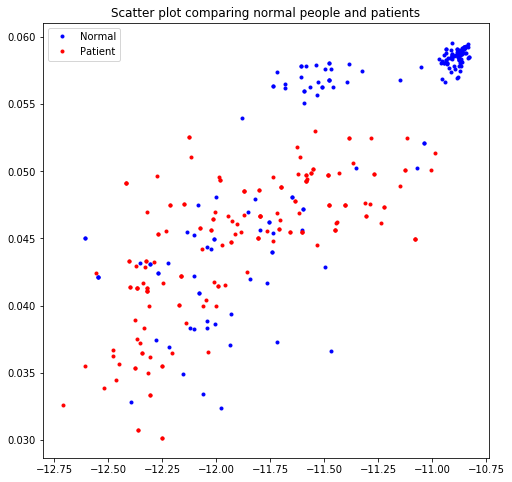

In [63]:
normal = t == 1
patient = t == 0
# Marker made as "." for clearer visibility of scatter plot.
plot(X[normal,0], X[normal,1], 'bo', marker=".", label='Normal')
plot(X[patient,0], X[patient,1], 'rs', marker=".", label='Patient')
title("Scatter plot comparing normal people and patients")
legend(loc=2)

Note the disparity in the scales of the two features.

Text(0.5,1,'Scatterplot plotted according to the value of t')

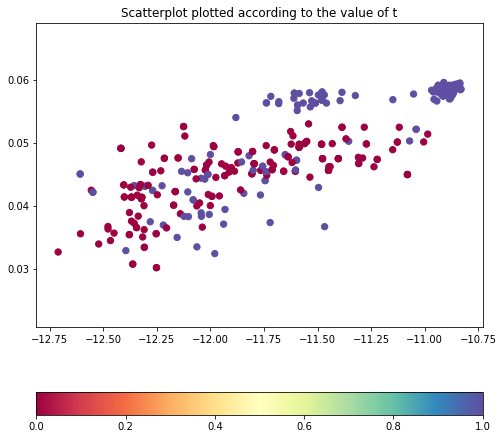

In [64]:
# An alternative way of plotting that colours the markers according to the value of t.
scatter(X[:,0], X[:,1], s=40, c=t, cmap=cm.Spectral)
colorbar(orientation='horizontal')
title("Scatterplot plotted according to the value of t")

### Mean and standard deviation

Find the mean (centroid) and standard deviation of the features as a whole and also for each of the classes. Check that the mean and standard
  deviation make sense in terms of your scatter plot.  You could plot the location of the centroid on the scatter plot.

In [65]:
# Normal class mean.
normalMean = np.mean(X[normal], axis=0)
print("Mean of normal class = " + str(normalMean))
# Patient class mean.
patientMean = np.mean(X[patient], axis=0)
print("Mean of patient class = " + str(patientMean))
# Whole mean.
wholeMean = np.mean(X, axis=0)
print("Mean as a whole = " + str(wholeMean))

# Normal class standard deviation.
normalStDev = np.std(X[normal], axis=0)
print("\nStandard deviation of normal class = " + str(normalStDev))
# Patient class standard deviation.
patientStDev = np.std(X[patient], axis=0)
print("Standard deviation of patient class = " + str(patientStDev))
# hole standard deviation.
wholeStDev = np.std(X, axis=0)
print("Standard deviation as a whole = " + str(wholeStDev))

Mean of normal class = [-11.34656154   0.05323007]
Mean of patient class = [-11.89623581   0.04465364]
Mean as a whole = [-11.62216853   0.04892984]

Standard deviation of normal class = [ 0.52683581  0.00757679]
Standard deviation of patient class = [ 0.4073886   0.00516589]
Standard deviation as a whole = [ 0.54510484  0.00777128]


<font color='blue'>From analysing the scatter plot below, the (x, y) position of the 3 calculated mean values (normal, patient and whole) make sense in comparison to the data distrubution of each class seperately and both classes as a whole.</font>

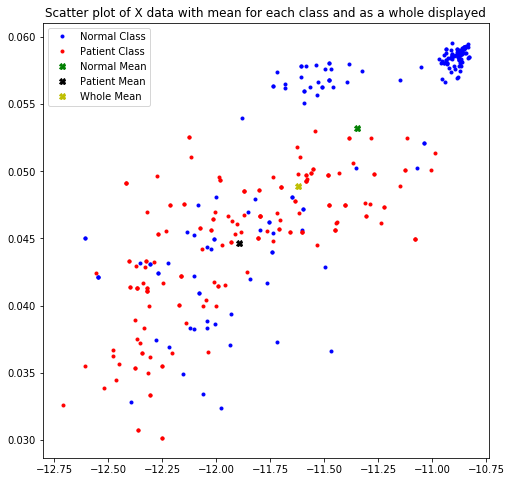

In [66]:
# Plotting all mean values on scatter plot to make sure that the calculated values make sense.
plot(X[normal,0], X[normal,1], 'bo', marker=".", label='Normal Class')
plot(X[patient,0], X[patient,1], 'rs', marker=".", label='Patient Class')
plot(normalMean[0], normalMean[1], 'go', marker ="X", label='Normal Mean')
plot(patientMean[0], patientMean[1], 'ks', marker ="X", label='Patient Mean')
plot(wholeMean[0], wholeMean[1], 'ys', marker ="X", label='Whole Mean')
title("Scatter plot of X data with mean for each class and as a whole displayed")
legend(loc=2)

### Covariance 

Use the Python command <code>cov</code> to return the covariance matrix (remember that the covariance matrix should be a 2 by 2 matrix for these data).  Check that the diagonal entries are what you expect from the standard deviations.

In [67]:
# Covariance matrix.
covMatrix = np.cov(X[:,0], X[:,1])
print(covMatrix)

[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


Write nested loops to calculate the covariance matrix by hand:
\begin{align*}
   S_{ij} = \frac{1}{N-1}\sum_{n=1}^N (x_{ni} - \bar{x}_{i})(x_{nj} - \bar{x}_{j})
\end{align*}
for each $i$ and $j$.

Check that you get the same result using both methods.  The <code>cov</code> function will divide by either $N$ or $N-1$ (read the help/docstring for <code>cov</code>) make sure the differences you obtain are not due to this.  The function <code>allclose</code> is useful for checking the result.

In [68]:
covMatrix = [[0, 0], [0, 0]] # Initialising cov matrix.
for i in X:
    for j in [0, 1]:
        covMatrix[j][j] += (i[int(j)] - wholeMean[int(j)]) ** 2  # Calculating variances (x and y).
    covMatrix[0][1] += (i[0] - wholeMean[0]) * (i[1] - wholeMean[1]) # Calculating covariance.
covMatrix[1][0] = covMatrix[0][1] # Duplicate variance as it occupies [0][1] and [1][0] of the covariance matrix.
covMatrix = [[val/(len(X)-1) for val in row] for row in covMatrix] # Divide all values in cov matrix by N-1.
print(np.matrix(covMatrix))

[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


Find the
correlation between the two variables $x_1$ and $x_2$ from the standardised
covariance matrix.  You can use  <code>corrcoef</code> to check your results, but you should be able to read it from the covariance matrix of the standardised data (why?).

<font color='blue'>**Why?** I am able to do that because the correlation matrix of the original data is the same as the covariance matrix of the standardised data.</font>

In [69]:
vx = sqrt(covMatrix[0][0])
vy = sqrt(covMatrix[1][1])
correlation = covMatrix[0][1]/(vx*vy)
print(correlation)

0.841676585139


## k-nearest neighbour classifier

Now we will use a k-nn classifier to classify the data.  You will have to divide the data into a training and a test set as shown below.  

In [70]:
# Divide the data into training and test sets by shuffling into a random order
# and choosing the first half as trainng data and reserving the second half for testing.

from numpy.random import permutation
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
Itr = I[:N//2]
Ite = I[N//2:]

Xtr = X[Itr,:]
ttr = t[Itr]

Xte = X[Ite,:]
tte = t[Ite]

Plot your training and test sets to make sure that they look like a fair random division of the data.

The training data are to be used to construct the classifier. The test data, which should not be used at all during training, are used to evaluate how well the classifier works.

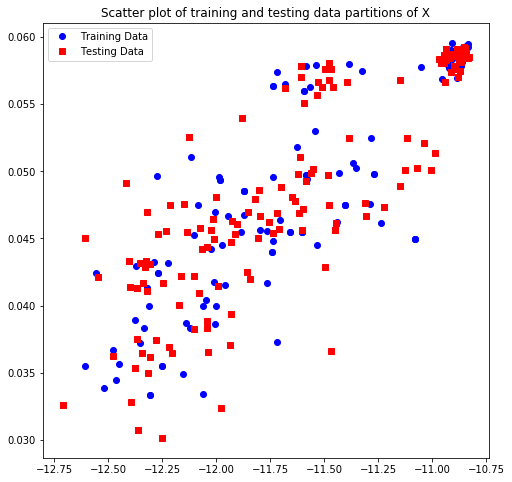

In [71]:
plot(Xtr[:,0], Xtr[:,1], 'bo', label='Training Data')
plot(Xte[:,0], Xte[:,1], 'rs', label='Testing Data')
title("Scatter plot of training and testing data partitions of X")
legend(loc=2)

### Standardisation

Since the scales of the data are so different, it will be important to standardise the data before trying to classify it.


Find the mean and standard deviations of the *training* data and use these to standardise the training data.  (You can use the commands
<code>mean</code> and <code>std</code> to find the mean and standard deviation.) Use the training data mean and standard deviation to standardise the test data.  Note that it's important to use the training data statistics (rather than the test data statistics) because both data should be treated in *exactly* the same way and we might only have a single test data point to classify.

 
Plot the standardised data 
and check your result by finding its mean and covariance matrix. 


In [72]:
# Calculate mean and standard deviations of training and testing data.
trainingMean = np.mean(Xtr, axis=0)
trainingStDev = np.std(Xtr, axis=0)

# Create standardised training and testing data (both based on training mean and standard deviations).
stanXtr = (Xtr - trainingMean) / trainingStDev
stanXte = (Xte - trainingMean) / trainingStDev

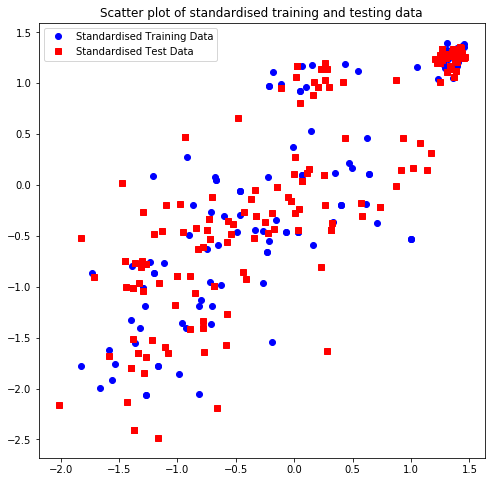

In [73]:
plot(stanXtr[:,0], stanXtr[:,1], 'bo', label='Standardised Training Data')
plot(stanXte[:,0], stanXte[:,1], 'rs', label='Standardised Test Data')
title("Scatter plot of standardised training and testing data")
legend(loc=2)

<font color='blue'>Calculating mean and covariance matrix of standardised data to check results.</font>

In [74]:
# Mean of standardised training data.
stanXtrMean = np.mean(stanXtr, axis=0)
print("Mean of standardised training data = " + str(stanXtrMean))

# Mean of standardised testing data.
stanXteMean = np.mean(stanXte, axis=0)
print("\nMean of standardised testing data = " + str(stanXteMean))

# Covariance matrix of standardised training data .
stanXtrCovMatrix = np.cov(stanXtr[:,0], stanXtr[:,1])
print("\nCovariance matrix of standardised training data:\n", stanXtrCovMatrix)

# Covariance matrix of standardised training data.
stanXteCovMatrix = np.cov(stanXte[:,0], stanXte[:,1])
print("\nCovariance matrix of standardised testing data:\n", stanXteCovMatrix)

Mean of standardised training data = [  6.73244232e-15  -2.03395353e-15]

Mean of standardised testing data = [-0.00718328 -0.0142327 ]

Covariance matrix of standardised training data:
 [[ 1.00564972  0.83953395]
 [ 0.83953395  1.00564972]]

Covariance matrix of standardised testing data:
 [[ 1.03839853  0.90967438]
 [ 0.90967438  1.10745048]]


We will use the k-nearest neighbour classifier from scikit learn, which is  quite an extensive implementation of various machine learning algorithms.

In [75]:
from sklearn import neighbors

In general you can train the clasifier using <code>Xtr</code> and <Ttr> and then make a prediction of the classes of the features in <code>Xte</code> as follows:
<pre>
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, ttr)   # Train it

y = knn.predict(Xte)  # Predict the class of the testing data
</pre>

The next cell shows you how to classify points on a grid in feature space.  This is so that we can gain an understanding of how the classifier works for a whole range of points.  Note that this will give poor results unless you have first standardised your data.

<font color='blue'>I've created a dictionary for naming data passed as parameter to functions. Main use is for plot titles and legengs, which makes data a lot clearer when multiple graphs are plotted, and makes debugging a lot easier. </font>

In [76]:
# dictionary containing data names
varNames = {"Training Data" : Xtr , "Training Class" : ttr , "Testing Data" : Xte, "Testing Class" : tte, "Standardised Training Data" : stanXtr, "Standardised Testing Data" : stanXte}

In [77]:
from sklearn.neighbors import KNeighborsClassifier

def clGraph(k, data, t, toTest, calcAccuracy, standData):
    """ Function used for plotting data according to its true class (parameter)
    or according to a predicted class from the a classifier. If calcAccuracy
    bool is true then the function returns the classification accuracy based
    on data passed in parameters. Function also performs calculation for
    standardised data if standData bool is true (in which case standardised
    testing data is passed in parameter).
    
    Data is plotted based on k nearest neighbors.
    
    Args:
        k: the number of nearest neighbors
        data: the data to be plotted
        t: the data targets
        toTest: bool value indiciating whether classification is done according to prediced class from training data
        calcAccuracy: bool value to inidicate whether accuracy should be returned rather
                      than plotted (this parameter makes sense in scope of this coursework)
        standData: bool value indicating whether standardised training data should be used for classification
                    in case of standardised Xte being used.
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    
    if toTest and standData:
        knn.fit(stanXtr, ttr)
    elif toTest:
        knn.fit(Xtr, ttr)
    else:
        knn.fit(data, t)
        
    if (calcAccuracy):
        numCorrect = 0
        pred = knn.predict(data)
        for ind, val in enumerate(t):
            if(val == pred[ind]):
                numCorrect += 1           
        accuracy = numCorrect/len(t)
        return accuracy 

    N, M = 60, 50

    Xgrid = linspace(np.amin(data[:,0]), np.amax(data[:,0]), N)
    Ygrid = linspace(np.amin(data[:,1]), np.amax(data[:,1]), M)
    pred = zeros((M,N))
    prob = zeros((M,N,2))
    for ny, y in enumerate(Ygrid):
        for nx, x in enumerate(Xgrid):
            pred[ny, nx] = knn.predict([[x, y]])          # Predict expects a matrix of features.
            prob[ny, nx, :] = knn.predict_proba([[x, y]]) # Probabilities of belonging to one class.
    pcolor(Xgrid, Ygrid, pred, cmap=cm.gray, alpha=0.2)
    colorbar()
    plot(data[t==0,0], data[t==0,1], 'b.')
    plot(data[t==1,0], data[t==1,1], 'r.')
    axis('tight')
    
    dataString = ""
    tString = ""
    title = ""
    
    # Get string for plot title.
    for key in varNames:
        if np.array_equal(np.array(varNames[key]), np.array(data)):
            dataString = key
        elif np.array_equal(np.array(varNames[key]), np.array(t)):
            tString = key

    if toTest:
        title = "k = " + str(k) + ", " + dataString +" data and " + tString + " class plotted according to predicted class from classifier" 
    else:
        title = "k = " + str(k) + ", " + dataString +" data and " + tString + " class plotted according to its true class"
    
    plt.title(title)
    plt.show()
    # Plot the class probabilites.
    figure()
    pcolor(Xgrid, Ygrid, prob[:,:,1], cmap=cm.coolwarm, alpha=0.8)
    colorbar()
    plot(data[t==0,0], data[t==0,1], 'bo')
    plot(data[t==1,0], data[t==1,1], 'ro')
    plt.title(title)
    plt.show()
    

In addition to classifying points on a grid to draw pictures, we can train the classifier on the training data and then classify each of the features in the test data (pretending that we don't know the true corresponding targets). 

Use your classifier to carry out $k=1$ classification of the
<code>Xte</code> tremor data. Following the example above,  plot the
training data according to its class and plot the test data according to
both its true class (from <code>tte</code>) and its predicted class from your
classifier.  Where the predicted class differs from the true class make
sure that you can see from the plot why the classifier has classified the
way it has. Work out the <i>classification accuracy</i> for your
classifier, that is the fraction of examples in <code>Xte</code> for which  the
classifier predicts the correct class.

Repeat the above for  $k = 3$ and $k = 10$ and give an explanation for
your results.

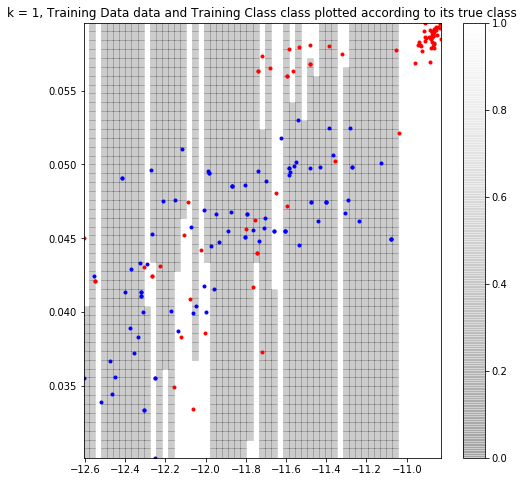

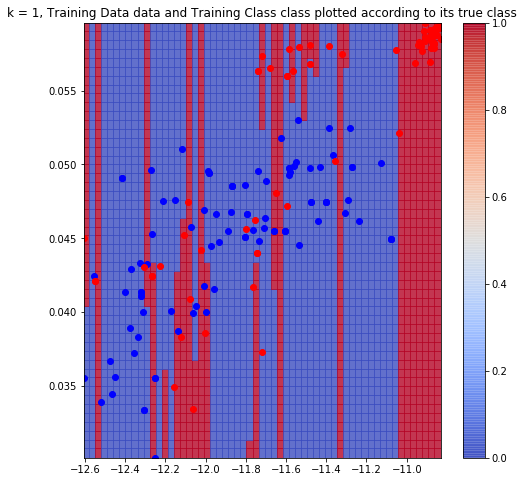

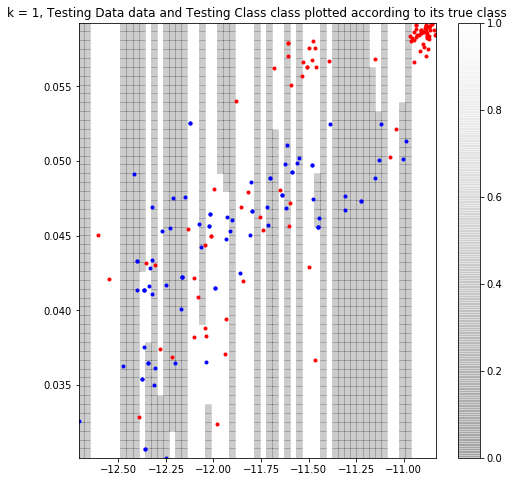

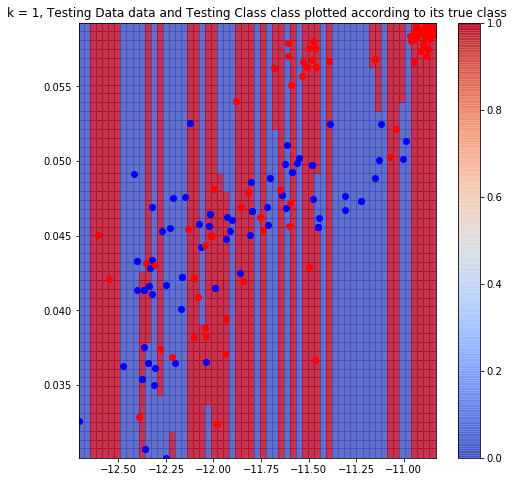

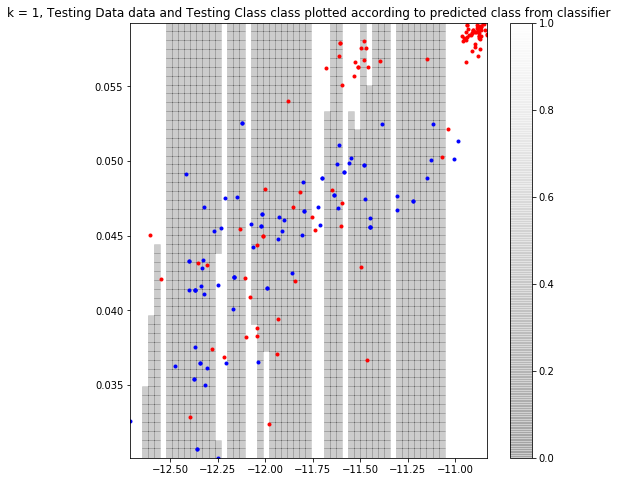

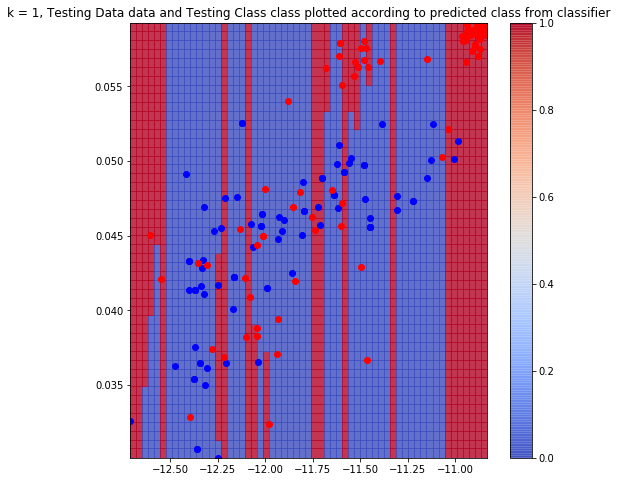

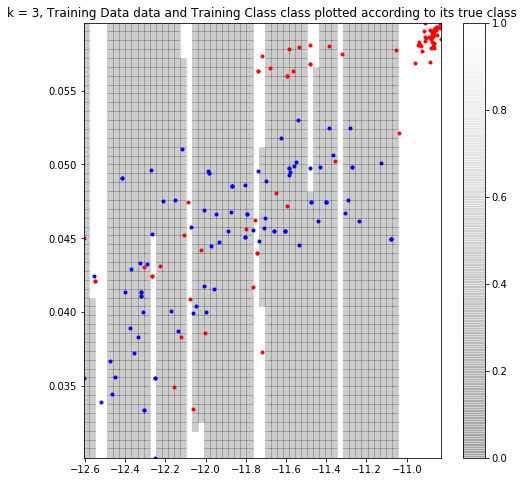

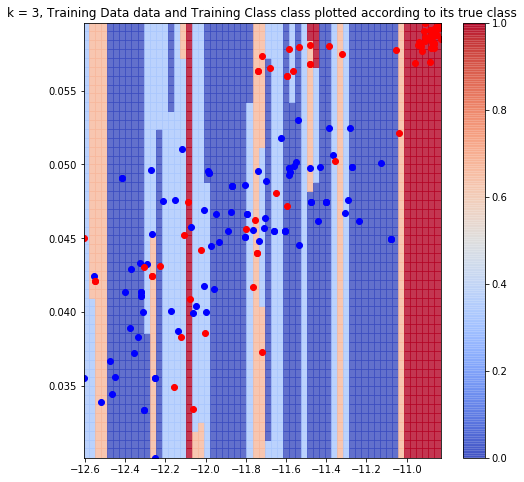

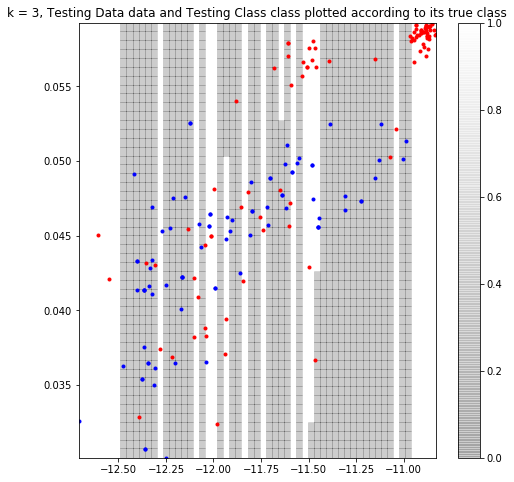

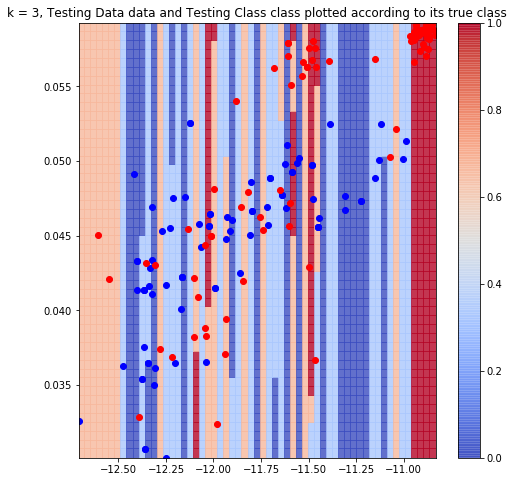

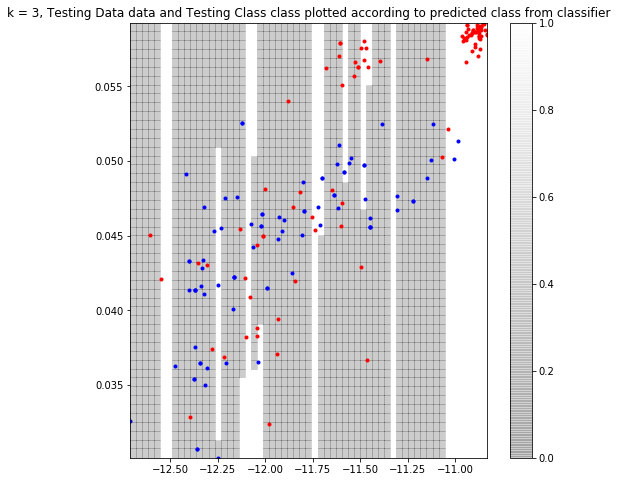

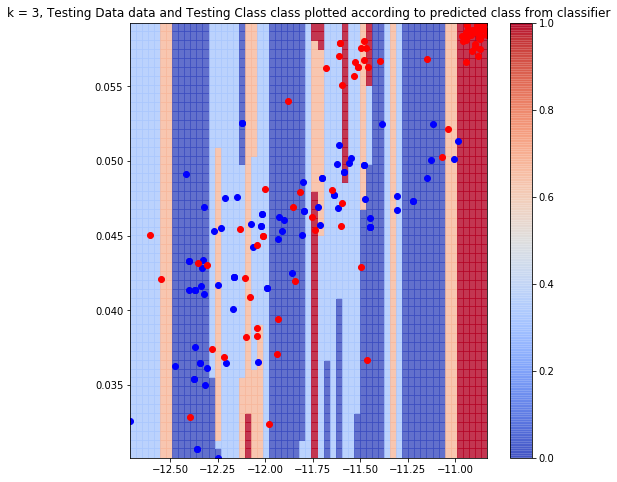

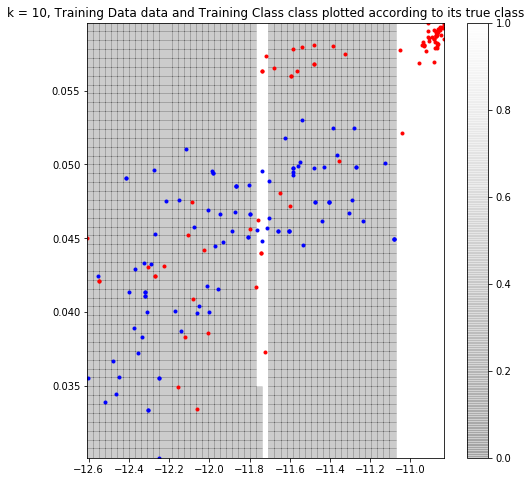

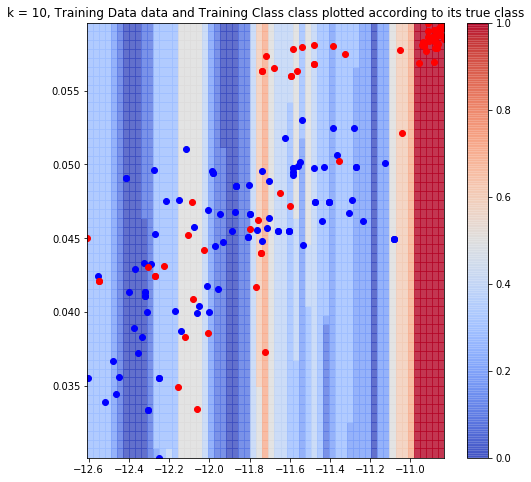

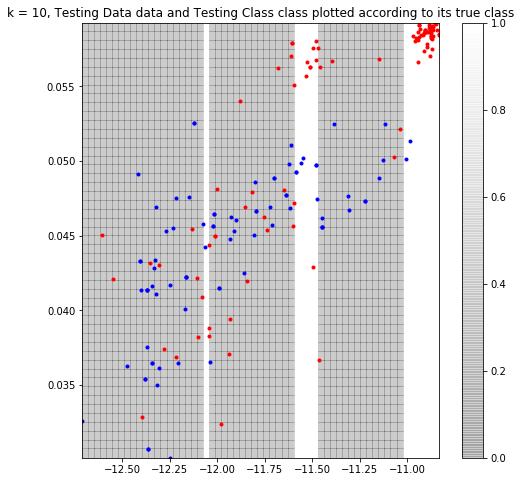

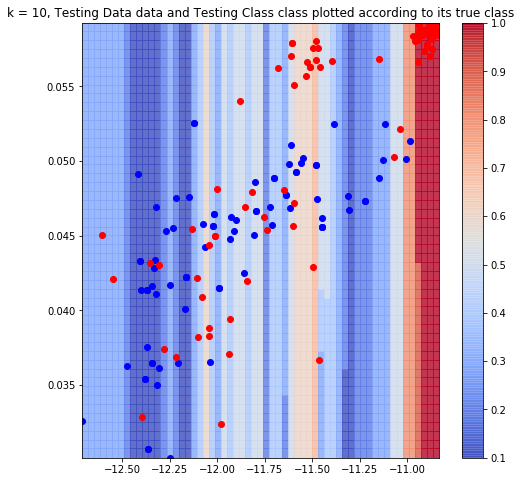

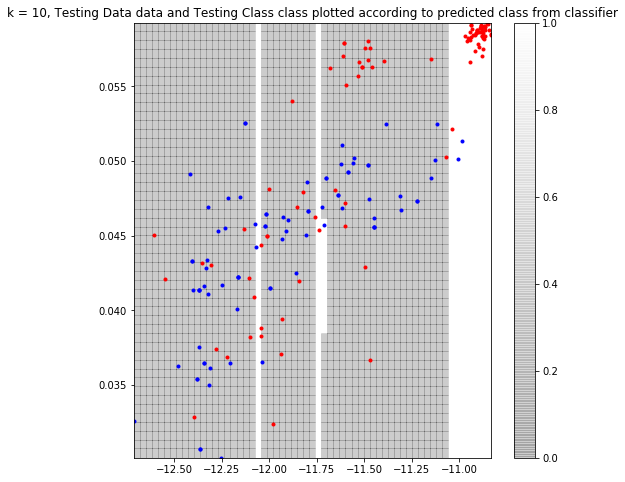

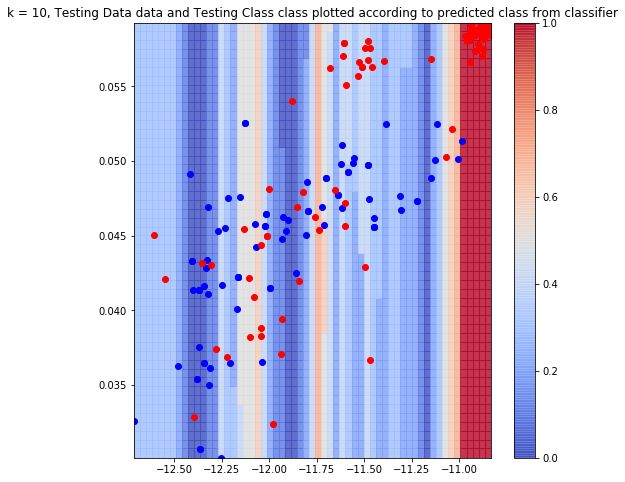

In [78]:
# Executing following calls for k = 1, 3, 10.
for i in [1, 3, 10]:
    # Plotting the training data according to its class.
    clGraph(i, Xtr, ttr, False, False, False)
    # Plotting the test data according to its true class (tte).
    clGraph(i, Xte, tte, False, False, False) 
    # Olotting the test data according to the predicted class.
    clGraph(i, Xte, tte, True, False, False)

<font color = "blue">
*** Results Discussion *** for k = 1, 3, 10 nearest neighbors:
<br>
<br>
From the graphs above we can observe that both max and min occur for k = 3 nearest neighbors. An explanation for observed error is the large number of similar values found in normal class and patient class. For k = 1 we observe a model that has limitations that stem from overfitting. On the other hand, we observe that although k = 3 may not overfit the data, neither does it model consistent classification; the lower tolerance, as opposed to k=1, allows for  more desirable but also worse results. Lastly, k = 10 operates on too low of a tolerance to accurately classify data (relative to k = 1, 3). Therefore, obtaining high accuracy is a chance rather than certainty that can depend on the data at hand.
</font>

Automate the procedure to plot a graph of the
classification accuracy of <code>Xte</code> versus $k$ for $k$ up to about 40.  What's the best $k$ to use?  Why are smaller $k$ worse?  Why are larger $k$ worse?

Now plot the classification accuracy for the <i>training </i> data (that
is call your classifier like <code>knn.predict(Xtr)</code>).
Explain the shape of the curve.

For k = 1 we get maximum accuracy of: 81.00558659217877 %
For k = 1 we get maximum accuracy of: 100.0 %


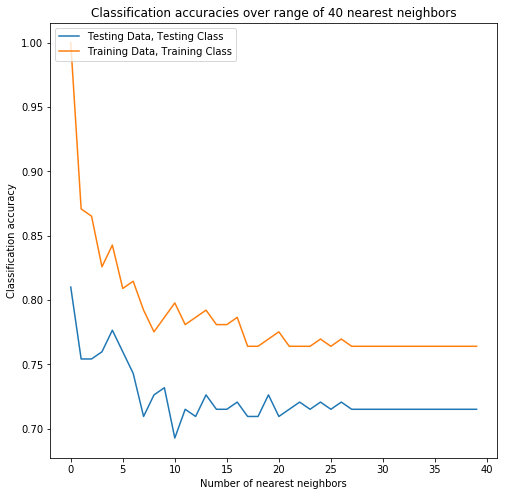

In [79]:
def plotAccuracies(k, data, t, toTest, calcAccuracy, standData):
    """ Calculating and plotting classification accuracies
    for data over range of k nearest neighbors.
    
    Args:
        k: range of number of nearest neighbors
        data: the data set 
        t: the data targets
        toTest: bool value indiciating whether classification is done with training data
        calcAccuracy: bool value to inidicate whether accuracy should be returned or plotted (passed to clGraph)
        standData: bool value indicating whether standardised data should be used
    """
    accuracies = []
    for i in range(1, k+1):
        accuracies.append(clGraph(i, data, t, toTest, calcAccuracy, standData))

    print("For k =" , accuracies.index(max(accuracies))+1 , "we get maximum accuracy of:" , max(accuracies)*100 , "%")
    
    
    dataString = ""
    tString = ""
    
    # Get string for legend
    for key in varNames:
        if np.array_equal(np.array(varNames[key]), np.array(data)):
            dataString = key
        elif np.array_equal(np.array(varNames[key]), np.array(t)):
            tString = key
    
    plt.plot(accuracies[:], label='%s, %s' %(dataString, tString))
    plt.title('Classification accuracies over range of %i nearest neighbors' %k)
    legend(loc=2)
    plt.xlabel('Number of nearest neighbors')
    plt.ylabel('Classification accuracy')
    plt.show
    
plotAccuracies(40, Xte, tte, True, True, False)
plotAccuracies(40, Xtr, ttr, True, True, False)

<font color = "blue">
*** Results Discussion *** for Xte up to k = 40:
<br>
<br>
***What is the best k to use?***
<br>k = 2, which has the highest accuracy of 79.89%.
<br>
<br>
***Why are smaller k worse?***
<br>Smallest k are worse because they can overfit the model for the classifier.
<br>
<br>
***Why are larger k worse?***
<br>Larger k are worse because they can underfit the model for the classifier.
<br>
<br>
*** Results Discussion *** for classification accuracy for the training data (knn.predict(Xtr)):
<br>
<br>
We observe an increased uncertainty as k increases. It is clear that for k = 1 we have 100% accuracy since we use same data to trian the classifier. By increasing the number of nearest neighbours, we also increase the chances of attaining other values than expected.


</font>

Now use the k-nn classifier to find the accuracy using the standardised data.  How does it compare with the raw data?

For k = 1 we get maximum accuracy of: 84.91620111731844 %


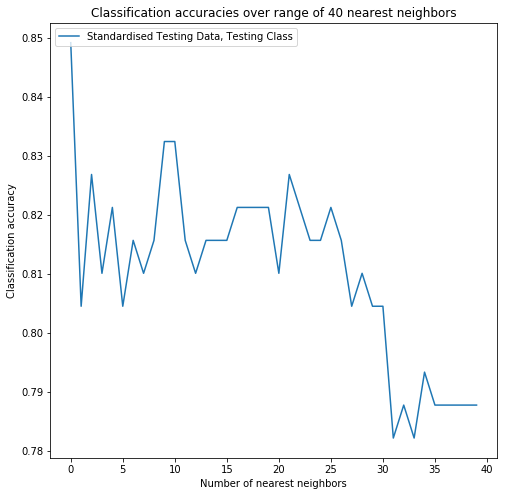

In [80]:
plotAccuracies(40, stanXte, tte, True, True, True)

<font color = "blue">
*** Results Comparison *** for accuracies of standardised data:
<br>
<br>
Standardised data has higher (highest) accuracy of 88.83% at k = 1.
<br>
<br>
We can also observe that the accuracy for all k values is higher for the standardised data.
<br>
<br>
Highest accuracy for unstandardised data is lower than the lowest accuracy for standardised data.

</font>

### Cross validation

Above we used all the training data and guessed the value of $k$. Much better is to estimate the optimum value of $k$, by dividing the training data into a training set and a *validation* set; the *generalisation* error is then estimated as the error on the validation set and the $k$ giving the minimum validation error is used for making predictions about unknown data.

Better than just dividing the training data into two is to use $k$ fold cross validation (don't confuse the $k$ in $k$ cross validation with the $k$ in $k$ nearest neighbours!).

To perform $k$-fold cross validation divide the training data into several (Nfold) portions or folds.  Use all but one of them to train the classifier, and evaluate the accuracy on the fold that you have reserved (the orange one in the picture below).  Do this for each fold in turn and average the error on the reserved folds to find an overall *validation error*, which is an estimate of the *generalisation error*, as illustrated for 5 folds below:

![Cross validation](cross-validation.png "Cross validation")


Usually dividing the data into 5 or 10 folds will be enough. 

You can either write your own code to do this or use the cross validation machinery provided by scikit learn. The following cell shows how the sklearn routines may be used to produce training and validation sets automatically. More information at <http://scikit-learn.org/stable/modules/cross_validation.html>.    You will need to adapt it for your data. 

You will probably get a warning that this is deprecated, but don't worry about it!

In [81]:
from sklearn.cross_validation import KFold         

def calcFoldValError(k, tData, tTargets, vData, vTargets):
    """ Calculating the validation error for a given fold.
    Args:
        k: the number of nearest neighbors
        tData: the training data
        tTargets: the training targets
        vData: the validation data
        vTargets: the validation targets
        
    Returns:
        The validation error for a given fold.
    """

    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(tData, tTargets)
   
    pred = knn.predict(vData)
    
    numCorrect = 0
    
    for ind in range(len(vTargets)):
            if(vTargets[ind] == pred[ind]):
                numCorrect += 1
    
    acc = numCorrect/len(vTargets)
    return 1-acc # Subtracting 1 by accuracy to get validation error.

def calcOverallValError(numFolds, k, data, t):
    """
    Estimate optimum value of k nearest neighbours by calculating the minimum
    overall validation error for a k value.

    Args:
        numFolds: the number of folds
        k: the number of nearest neighbors
        data: data to be used for overall validation error
        t: the targets for data
    Returns:
        the overall validation error the the k value (on the 'data' data set)

    """
    
    cv = KFold(len(t), n_folds = numFolds, shuffle=True)
    
    validation_err = [] # Validation errors for multiple folds calculated for k value.
    
    fold = 0
    
    for train, validation in cv:
        fold += 1
        validation_err.append(calcFoldValError(k, data[train], t[train], data[validation], t[validation]))
    return mean(validation_err)

Make a plot of the training and validation errors as $k$ varies from 1 to, say, 50.  

*  What is the best value of $k$?  
*  What is the error on the **test** set with the best $k$?
*  Make a plot of the decision regions (as above) with the best $k$
*  What can you say about the performance of the classifier when $k$ is too large or too small?
*  How do you think the optimum $k$ will vary if the amount of training data available is larger or smaller?  Can you test your hypothesis?

<font color = "blue">
The above set of questions are completed for standardised data but calculations and graph includes unstandardised data as well; this allows me to plot both results for both sets of data on one graph for clear comparison in the next section.
</font>

The minimum validation error for standardised data using 5 folds is:  12.9047619048 %, where optimal k is: 1
The minimum validation error for unstandardised data using 5 folds is:  22.9841269841 %, where optimal k is: 19


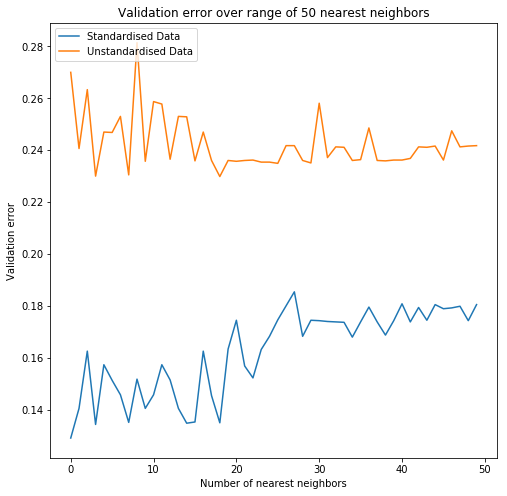

In [82]:
valErrStan = []
valErrUnstan = []
for k in range(1, 51):
    valErrStan.append(calcOverallValError(5, k, stanXtr, ttr))
for k in range(1, 51):
    valErrUnstan.append(calcOverallValError(5, k, Xtr, ttr))

plt.plot(valErrStan[:], label='Standardised Data')
plt.show
plt.plot(valErrUnstan[:], label='Unstandardised Data')
plt.show
plt.title('Validation error over range of 50 nearest neighbors')
legend(loc=2)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Validation error')


print("The minimum validation error for standardised data using 5 folds is: ", min(valErrStan)*100, "%, where optimal k is:", valErrStan.index(min(valErrStan))+1)
print("The minimum validation error for unstandardised data using 5 folds is: ", min(valErrUnstan)*100, "%, where optimal k is:", valErrUnstan.index(min(valErrUnstan))+1)

<font color="blue">
*** Cross Validation Comparison *** for standardised data:
<br>
<br>
***What is the best value of k?***
<br>2 
<br>
<br>
***What is the error on the test set with the best k?***
<br>16.27%
<br>
<br>
***Make a plot of the decision regions (as above) with the best k:***
</font>

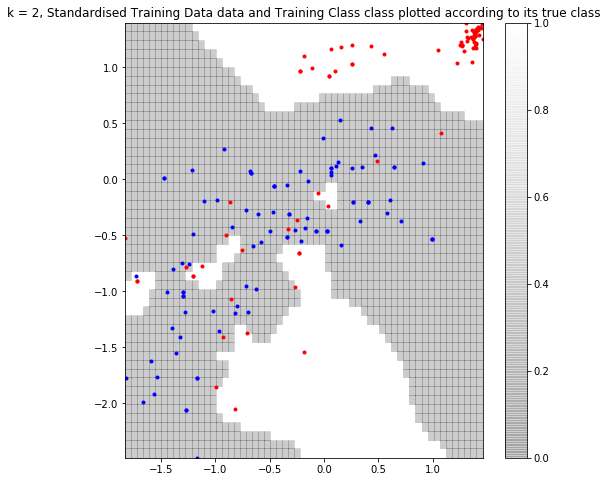

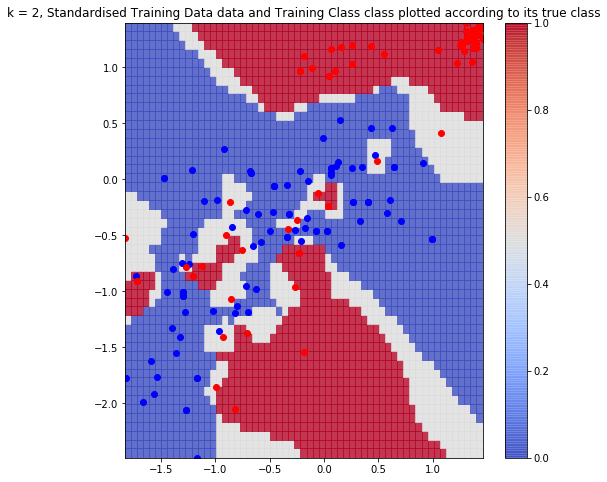

In [83]:
clGraph(2, stanXtr, ttr, False, False, True)

<font color="blue">
*** Cross Validation Comparison *** for standardised data (continued):
<br>
<br>
***What can you say about the performance of the classifier when k is too large or too small?***
<br>
We can observe that the smallest k value means that the classifier overfits. On the other hand, if k is too large, the classifier underfits. Both cases are not desirable and result in a lower accuracy.
<br>
<br>
***How do you think the optimum k will vary if the amount of training data available is larger or smaller? Can you test your hypothesis?***
<br>
I think a larger training data set will result in a higher optimal k value will increase as more variables will be required to correctly classify data, such as to prevent overfitting or underfitting. On the other hand, a smaller training data set will result in a smaller optimal k value as to not overfit and as a result incorrectly classify the data. We could test the hypothesis for either scenario by passing larger or smaller amounts of training data and recording the optimal k value.
</font>

### Unstandardised data

Compare the performance of the classifier on the unstandardised data.  Why are they different?  

<font color="blue">
*** Comparing the performance of the classifier on the unstandardised data: ***
<br><br>
We observe that the unstandardised data set clear has higher validation error: for all k values the unstandardised data set has a higher validation error. An explanation for this is that the values do not equally spaced, which results in a less accuracte classification.
<br><br>
***Refer to graph plotted below for clear comparison of validation error between the two sets of data.***
</font>

Text(0,0.5,'Validation error')

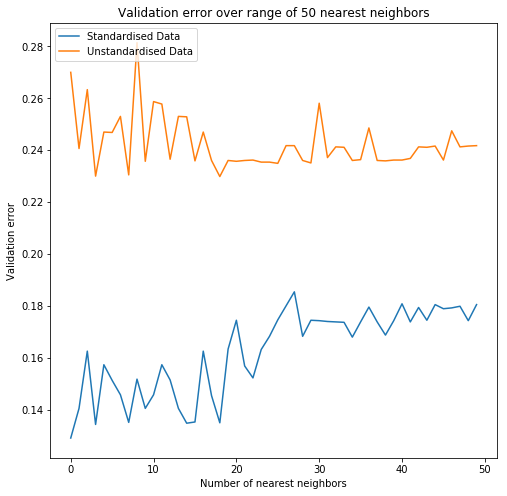

In [84]:
plt.plot(valErrStan[:], label='Standardised Data')
plt.show
plt.plot(valErrUnstan[:], label='Unstandardised Data')
plt.show
plt.title('Validation error over range of 50 nearest neighbors')
legend(loc=2)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Validation error')

### Sphering

Sphere  the tremor data and plot it in the sphered coordinates. Compute the mean and covariance matrix of the sphered data: are they what you expect?


In [85]:
Xmean = numpy.mean(X, axis=0)
sph = cov((X - Xmean).T)
lam, U = eigh(sph)
lam[lam<0] = 0
Winv=U@diag(1/sqrt(lam))@U.T
Z=X@Winv

print("Mean of sphered data: ", numpy.mean(Z, axis=0))
print("Covariance matrix of sphered data:\n ", cov(Z.T))

Mean of sphered data:  [-21.82337549  44.57376294]
Covariance matrix of sphered data:
  [[  1.00000000e+00  -6.45823906e-16]
 [ -6.45823906e-16   1.00000000e+00]]


<font color = "blue">(Expected results)</font>

Find the classification accuracy using the sphered data.

Classification accuracy using the sphered data: 86.5396825397 %


Text(0.5,1,'Scatter plot of sphered data')

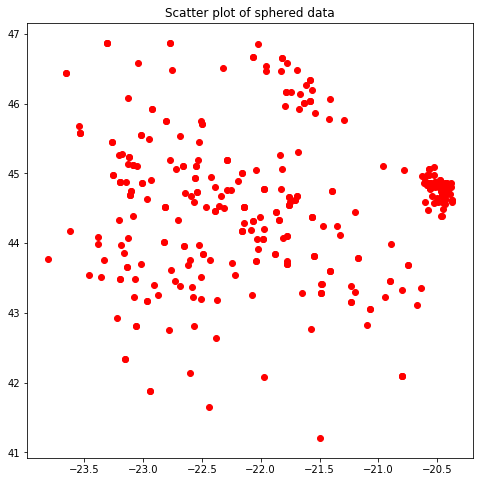

In [86]:
#acc = clGraph(5, data, t, False, True, False):
xSphered = Z
N = xSphered.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
I_train = I[:N//2]
I_test = I[N//2:]

Xtr_sphered = xSphered[Itr,:]
tr_sphered = t[Itr]

Xte_sphered = xSphered[Ite,:]
te_sphered = t[Ite]

# Using of cross validation for classifying accuracy.
knn = 2
numFolds = 5
print("Classification accuracy using the sphered data:", 100-calcOverallValError(numFolds, knn, Xtr_sphered, tr_sphered)*100, "%")

scatter(Z.T[0],Z.T[1], c="r", marker="o")
title("Scatter plot of sphered data")

## Classifying digits

Here you'll use the k-nn classifier to distinguish between digits. You can load and plot a dataset of digit images as follows (keep executing the cell to see more digits)

(1797, 64)


Text(0.5,1,'5')

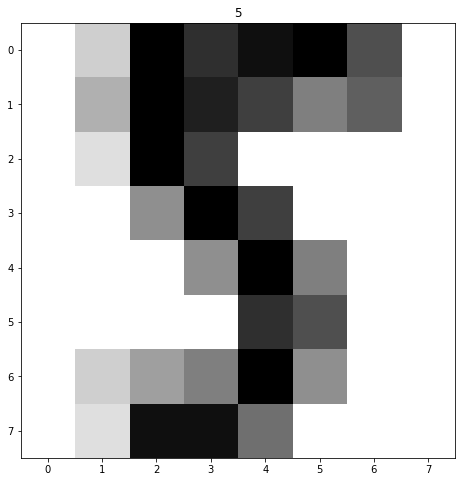

In [87]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
print(digits.data.shape)

# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0])
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r)
title("%d" % digits.target[j])

As you can see there are 1797 images arranged as 64-dimensional vectors. Choose two digits as the two classes that you'll use as the two classes and arrange them as a data and target matrix as follows.

In [88]:
mydigits = [5, 0]  # Choose your own!
I = np.logical_or(digits.target == mydigits[0], digits.target == mydigits[1])
X = digits.data[I,:]   # Features
# Make the targets 0 or 1 coresponding to the two classes
tmp = digits.target[I]
t = zeros(X.shape[0])
for i in (0,1):
    t[tmp == mydigits[i]] = i

Text(0.5,1,'1')

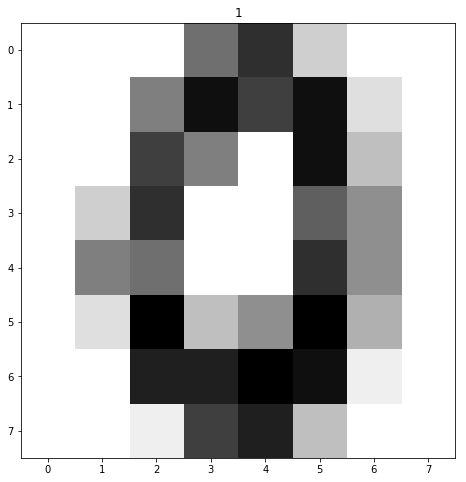

In [89]:
# Check the above: the title is now the class label, 0 or 1. 
# Re-execute to check that digits are labelled consistently
j = randint(len(t))
imshow(reshape(X[j], (8,8)), cmap=cm.gray_r)
title("%d" % t[j])

### k-nn classification

Now use your k-nn classifier to classify the image vectors.  What is the accuracy?   Note that here you should (a) split your data into training and testing data and (b) use cross validation on the training data to determine the best value of $k$ before finding the accuracy on the test data.  One reasonable way of proceeding would be to split the data into equal-sized training and test sets and then use 5 or 10 fold cross validation on the training set to determine $k$.

Do the misclassified images look like the other class?

In [103]:
#(a) Split data
from numpy.random import permutation
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
Itr = I[:N//2]
Ite = I[N//2:]

Xtr_img = X[Itr,:]
ttr_img = t[Itr]

Xte_img = X[Ite,:]
tte_img = t[Ite]

acc = []
for k in range(1, 51):
    acc.append(1-calcOverallValError(5, k, Xtr_img, ttr_img)) # 1 - error is accuracy
    
maxAcc = max(acc)
optimalKs = []
for ind, val in enumerate(acc):
    if val == maxAcc:
        optimalKs.append(ind+1)
print(optimalKs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50]


<font color = "blue">I created an array above called optimalKs just to point out the interesting fact of how many k values all hold the highest accuracy. There, as each k value holds the same (highest) accuracy, it seems appropriate to use all optimal ks to calculate the cross folded classiciation accuracy out of interest. Although most k values might result in same accuracy, it may occur that some will result in a different classifier accuracy.</font>

In [105]:
imgAcc = []
for optimalK in optimalKs:
    imgAcc.append((1-calcFoldValError(optimalK, Xtr_img, ttr_img, Xte_img, tte_img))*100)

print("Accuracies of classifier when classifying the image vectors for all optimal ks of accuracy =" , maxAcc , ":\n")
for ind, val in enumerate(imgAcc):
    print("Optimal k value of", optimalKs[ind],"results in classifier accuracy of image vectors of:" , val)

Accuracies of classifier when classifying the image vectors for all optimal ks of accuracy = 1.0 :

Optimal k value of 1 results in classification accuracy of image vectors of: 100.0
Optimal k value of 2 results in classification accuracy of image vectors of: 100.0
Optimal k value of 3 results in classification accuracy of image vectors of: 100.0
Optimal k value of 4 results in classification accuracy of image vectors of: 100.0
Optimal k value of 5 results in classification accuracy of image vectors of: 99.44444444444444
Optimal k value of 6 results in classification accuracy of image vectors of: 99.44444444444444
Optimal k value of 7 results in classification accuracy of image vectors of: 99.44444444444444
Optimal k value of 8 results in classification accuracy of image vectors of: 99.44444444444444
Optimal k value of 9 results in classification accuracy of image vectors of: 99.44444444444444
Optimal k value of 10 results in classification accuracy of image vectors of: 99.444444444444